In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

In [32]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/train_translate_clean.xlsx', engine='openpyxl')
data

ID                                   first_party  \
0     TRAIN_0000                             Phil A. St. Amant   
1     TRAIN_0001                                Stephen Duncan   
2     TRAIN_0002                             Billy Joe Magwood   
3     TRAIN_0003                                    Linkletter   
4     TRAIN_0004                            William Earl Fikes   
...          ...                                           ...   
2473  TRAIN_2473  HollyFrontier Cheyenne Refining, LLC, et al.   
2474  TRAIN_2474           Grupo Mexicano de Desarrollo, S. A.   
2475  TRAIN_2475                                       Peguero   
2476  TRAIN_2476        Immigration and Naturalization Service   
2477  TRAIN_2477                                       Markman   

                             second_party  \
0                      Herman A. Thompson   
1                          Lawrence Owens   
2          Tony Patterson, Warden, et al.   
3                                  Walker   
4                                 Alabama   
...                                   ...   
2473  Renewable Fuels Association, et al.   
2474             Alliance Bond Fund, Inc.   
2475                        United States   
2476                              St. Cyr   
2477           Westview Instruments, Inc.   

                                                  facts  \
0     On June 27, 1962, Phil St. Amant, a candidate ...   
1     Ramon Nelson was riding his bike when he suffe...   
2     An Alabama state court convicted Billy Joe Mag...   
3     Victor Linkletter was convicted in state court...   
4     On April 24, 1953 in Selma, Alabama, an intrud...   
...                                                 ...   
2473  Congress amended the Clean Air Act through the...   
2474  Alliance Bond Fund, Inc., an investment fund, ...   
2475  In 1992, the District Court sentenced Manuel D...   
2476  On March 8, 1996, Enrico St. Cyr, a lawful per...   
2477  Herbert Markman owns the patent to a system th...   

                                              translate  first_party_winner  
0     1962년 6월 27일, 공직 후보인 Phil St. Amant는 루이지애나 주 배...                   1  
1     Ramon Nelson은 자전거를 타고 가다가 야구 방망이로 머리 뒤쪽을 치명상을 ...                   0  
2     앨라배마 주 법원은 Billy Joe Magwood에게 살인죄를 선고하고 사형을 선...                   1  
3     Victor Linkletter는 Mapp 대 오하이오 사건의 수정헌법 4조에 관한...                   0  
4     1953년 4월 24일 앨라배마 주 셀마에서 시장의 딸의 아파트에 침입자가 침입했습...                   1  
...                                                 ...                 ...  
2473  의회는 화석 연료에 대한 국가의 의존도를 줄이기 위해 2005년 에너지 정책법을 통...                   1  
2474  투자 펀드인 Alliance Bond Fund, Inc.는 멕시코 정부가 후원하는 ...                   1  
2475  1992년 지방 법원은 Manuel D. Peguero가 연방 마약 혐의에 대해 유...                   0  
2476  1996년 3월 8일, 합법적인 영주권자인 Enrico St. Cyr는 코네티컷 법...                   0  
2477  Herbert Markman은 광학 감지기로 읽을 수 있는 바코드를 포함하여 트랜잭...                   0  

[2478 rows x 6 columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   translate           2478 non-null   object
 5   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 116.3+ KB


In [34]:
data.describe(include=object)

ID    first_party   second_party  \
count         2478           2478           2478   
unique        2478           2110           1974   
top     TRAIN_0000  United States  United States   
freq             1            154            240   

                                                    facts  \
count                                                2478   
unique                                               2478   
top     On June 27, 1962, Phil St. Amant, a candidate ...   
freq                                                    1   

                                                translate  
count                                                2478  
unique                                               2478  
top     1962년 6월 27일, 공직 후보인 Phil St. Amant는 루이지애나 주 배...  
freq                                                    1

In [35]:
data.nunique()

ID                    2478
first_party           2110
second_party          1974
facts                 2478
translate             2478
first_party_winner       2
dtype: int64

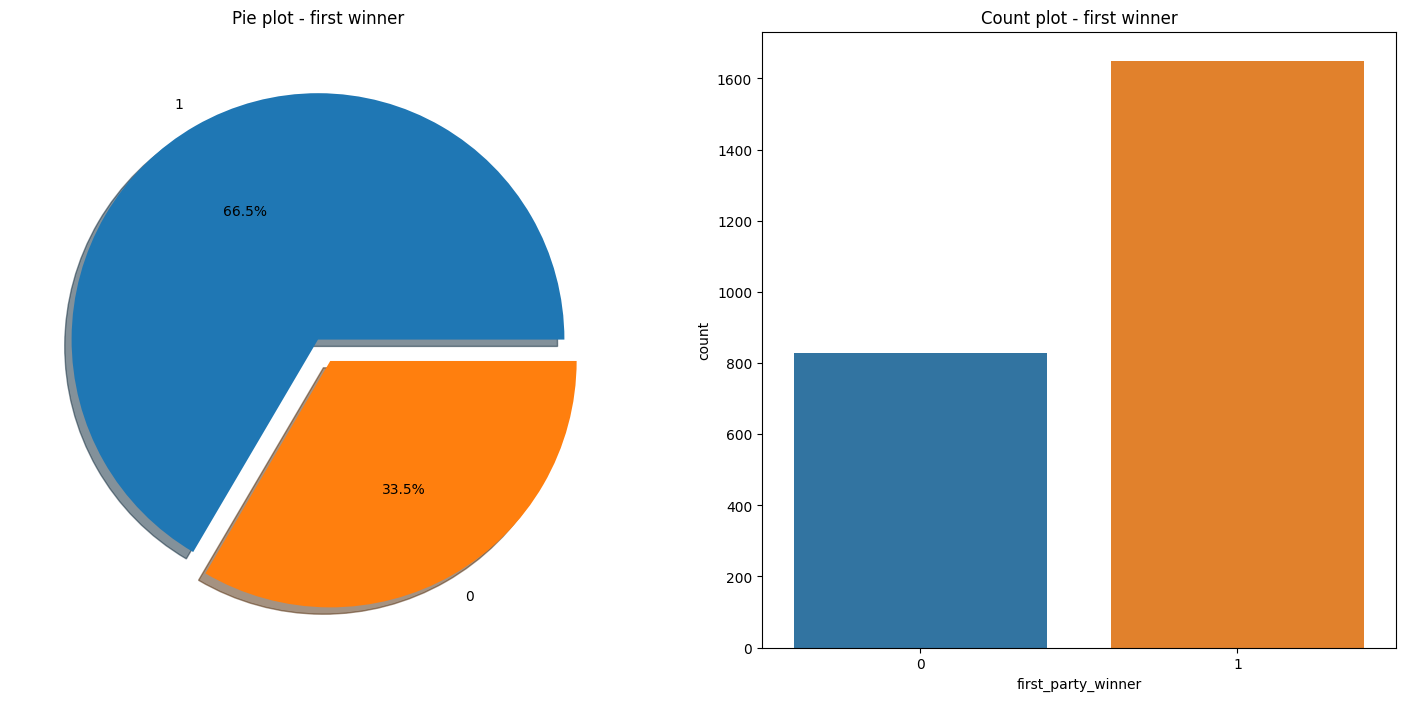

In [36]:
f, ax =plt.subplots(1,2, figsize =(18,8))
data['first_party_winner'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True)
ax[0].set_title('Pie plot - first winner')
ax[0].set_ylabel('')
sns.countplot(x='first_party_winner', data=data, ax = ax[1])
ax[1].set_title('Count plot - first winner')
plt.show()

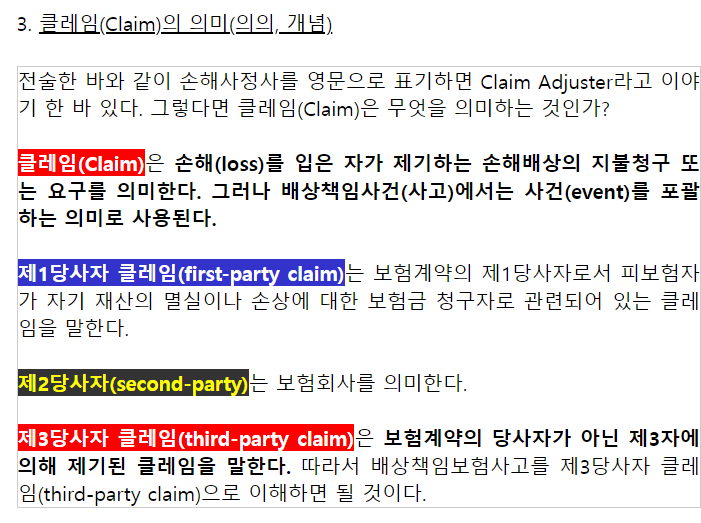

In [37]:
print(data['first_party'].unique())

['Phil A. St. Amant' 'Stephen Duncan' 'Billy Joe Magwood' ...
 'Grupo Mexicano de Desarrollo, S. A.' 'Peguero' 'Markman']


<Axes: title={'center': 'first_party'}>

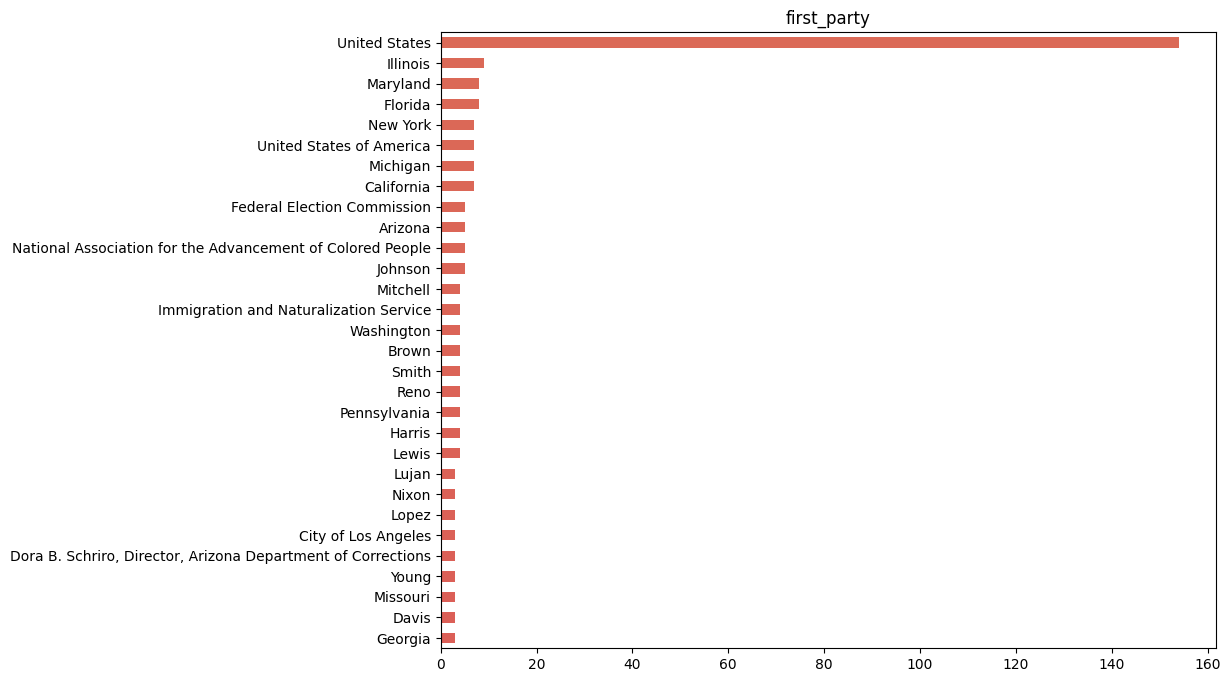

In [38]:
first =data["first_party"].value_counts().head(30)
colors = sns.color_palette('hls',len(data['first_party'].unique()))
first = first.sort_values(ascending=True)
first.plot.barh(figsize=(10,8), title="first_party", color=colors)

In [39]:
df = pd.DataFrame(data['first_party'].value_counts())
df

first_party
United States             154
Illinois                    9
Maryland                    8
Florida                     8
New York                    7
...                       ...
David Carpenter             1
Larry Gene Heath            1
PGA TOUR, Inc.              1
PPL Montana, LLC            1
Markman                     1

[2110 rows x 1 columns]

In [40]:
df['first_party'].value_counts()

1      1992
2        68
3        29
4         9
7         4
5         4
8         2
154       1
9         1
Name: first_party, dtype: int64

In [41]:
print(data['second_party'].unique())

['Herman A. Thompson' 'Lawrence Owens' 'Tony Patterson, Warden, et al.'
 ... 'Alliance Bond Fund, Inc.' 'St. Cyr' 'Westview Instruments, Inc.']


<Axes: title={'center': 'second_party'}>

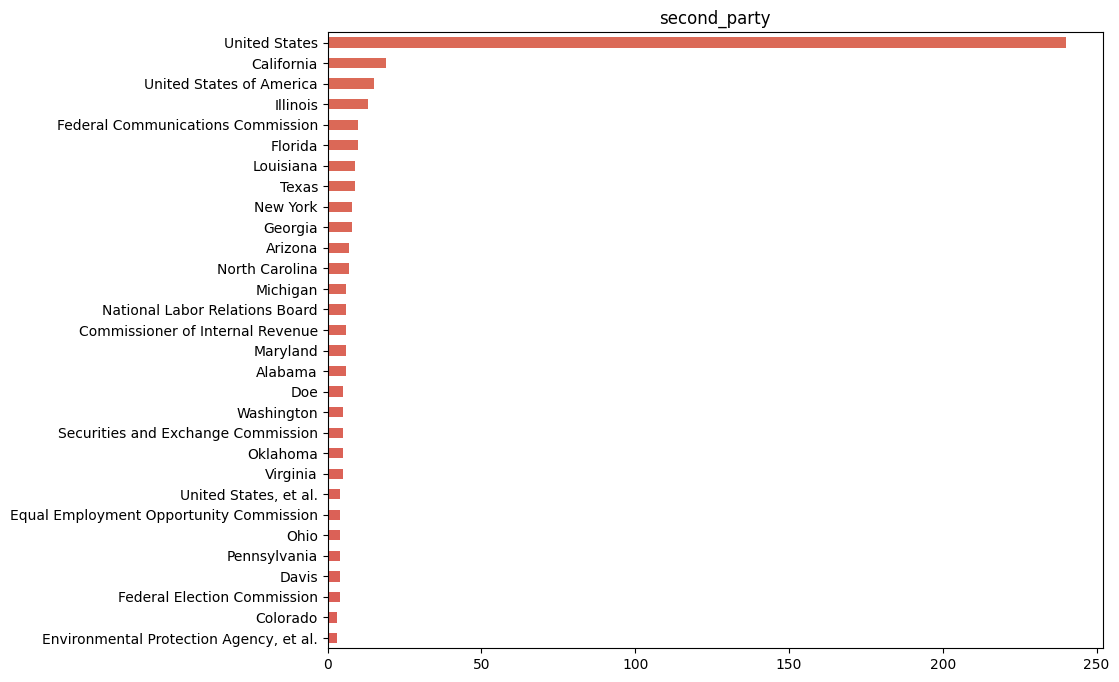

In [42]:
first =data["second_party"].value_counts().head(30)
colors = sns.color_palette('hls',len(data['second_party'].unique()))
first = first.sort_values(ascending=True)
first.plot.barh(figsize=(10,8), title="second_party", color=colors)

In [43]:
df = pd.DataFrame(data['second_party'].value_counts())
df

second_party
United States                               240
California                                   19
United States of America                     15
Illinois                                     13
Federal Communications Commission            10
...                                         ...
David Boren, Governor of Oklahoma             1
Federal Bureau of Prisons et al.              1
Town of Harrison                              1
Charles Burr et al.                           1
Westview Instruments, Inc.                    1

[1974 rows x 1 columns]

In [44]:
df['second_party'].value_counts()

1      1863
2        68
3        15
4         6
6         5
5         5
10        2
9         2
8         2
7         2
240       1
19        1
15        1
13        1
Name: second_party, dtype: int64

# 전처리

In [45]:
import nltk #natural language toolkit
nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [46]:
nltk.corpus.names.fileids()

['female.txt', 'male.txt']

In [47]:
from nltk.corpus import names #corpus=말뭉치,이름 관련 부분 다루기 위한 객체
from nltk.stem import WordNetLemmatizer #어근 관련 부분, WordNetLemmatizer = 원형 복원, 같은 의미를 가지는 단어를 사전형으로 통일

In [48]:
all_names=set(names.words())
lemmatizer=WordNetLemmatizer()

In [49]:
fact=[]

fact=data['facts'].to_list()
fact[0]

'On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant?™s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana?™s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with ?œmalice.?? Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rathe

In [50]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [52]:
clean=[]

for fact in fact:
    clean.append([lemmatizer.lemmatize(word.lower()) # 소문자 변환
                                   for word in fact.split()# 공백 기준 문자열 분리
                                   if word.isalpha() #알파벳인지 검사, 해당 단어가 문자이고
                                   and word not in all_names]) #&단어를 모아놓은 all_names에 해당 단어 없으면 원소로 넣어주기

clean[0]

['on',
 'a',
 'candidate',
 'for',
 'public',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'baton',
 'during',
 'this',
 'amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activity',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'teamster',
 'amant',
 'implicated',
 'an',
 'east',
 'baton',
 'rouge',
 'deputy',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'teamster',
 'union',
 'and',
 'political',
 'thompson',
 'successfully',
 'sued',
 'amant',
 'for',
 'first',
 'circuit',
 'court',
 'of',
 'appeal',
 'holding',
 'that',
 'thompson',
 'did',
 'not',
 'show',
 'amant',
 'acted',
 'with',
 'thompson',
 'then',
 'appealed',
 'to',
 'the',
 'supreme',
 'court',
 'of',
 'that',
 'court',
 'held',
 'although',
 'public',
 'figure',
 'forfeit',
 'some',
 'of',
 'their',
 'first',
 'amendment',
 'protection',
 'from',
 'amant',
 'accused',
 'thompson',
 '

In [53]:
cleaned_facts=[]

for fact in clean:
  cleaned_facts.append(' '.join(fact))

cleaned_facts[0]

'on a candidate for public made a television speech in baton during this amant accused his political opponent of being a communist and of being involved in criminal activity with the head of the local teamster amant implicated an east baton rouge deputy in a scheme to move money between the teamster union and political thompson successfully sued amant for first circuit court of appeal holding that thompson did not show amant acted with thompson then appealed to the supreme court of that court held although public figure forfeit some of their first amendment protection from amant accused thompson of a crime with utter disregard of whether the remark were that court held that the first amendment protects robust rather than an open season to shoot down the good name of anyone who happens to be a public'

In [54]:
tot=",".join(cleaned_facts)
tot

'on a candidate for public made a television speech in baton during this amant accused his political opponent of being a communist and of being involved in criminal activity with the head of the local teamster amant implicated an east baton rouge deputy in a scheme to move money between the teamster union and political thompson successfully sued amant for first circuit court of appeal holding that thompson did not show amant acted with thompson then appealed to the supreme court of that court held although public figure forfeit some of their first amendment protection from amant accused thompson of a crime with utter disregard of whether the remark were that court held that the first amendment protects robust rather than an open season to shoot down the good name of anyone who happens to be a public,wa riding his bike when he suffered a lethal blow to the back of his head with a baseball after two eyewitness identified owen from an array of photo and then a he wa tried and convicted fo

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus.reader.tagged import word_tokenize
from nltk.corpus import stopwords

stopwords_m = ["'",'','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','court','wa']

stop_words = set(stopwords.words('english'))#패키지에 미리정의된 영어불용어를 가져옴

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [59]:
word_tokens = word_tokenize(tot)
result = []

for w in word_tokens:
    if w.isalpha() and w not in stopwords_m and w not in stop_words:
        result.append(w)

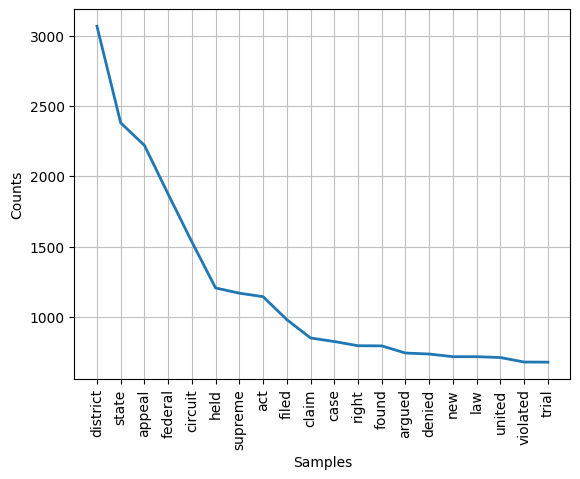

<Axes: xlabel='Samples', ylabel='Counts'>

In [60]:
from nltk import Text

text=Text(result)


text.plot(20)

In [61]:
c=Counter(result).most_common()
c

[('district', 3068),
 ('state', 2380),
 ('appeal', 2220),
 ('federal', 1873),
 ('circuit', 1533),
 ('held', 1205),
 ('supreme', 1168),
 ('act', 1143),
 ('filed', 980),
 ('claim', 849),
 ('case', 824),
 ('right', 794),
 ('found', 793),
 ('argued', 742),
 ('denied', 735),
 ('new', 716),
 ('law', 716),
 ('united', 710),
 ('violated', 678),
 ('trial', 677),
 ('jury', 657),
 ('would', 647),
 ('two', 609),
 ('granted', 603),
 ('affirmed', 568),
 ('officer', 568),
 ('amendment', 564),
 ('police', 545),
 ('sued', 543),
 ('could', 538),
 ('suit', 521),
 ('section', 511),
 ('evidence', 510),
 ('first', 508),
 ('government', 507),
 ('convicted', 491),
 ('also', 483),
 ('judge', 472),
 ('decision', 468),
 ('action', 464),
 ('one', 459),
 ('tax', 458),
 ('ruled', 450),
 ('motion', 447),
 ('statute', 436),
 ('violation', 421),
 ('company', 410),
 ('reversed', 409),
 ('holding', 403),
 ('appealed', 391),
 ('judgment', 369),
 ('dismissed', 369),
 ('required', 367),
 ('ninth', 363),
 ('employee', 360),

In [62]:
fd = text.vocab()
fd

FreqDist({'district': 3068, 'state': 2380, 'appeal': 2220, 'federal': 1873, 'circuit': 1533, 'held': 1205, 'supreme': 1168, 'act': 1143, 'filed': 980, 'claim': 849, ...})

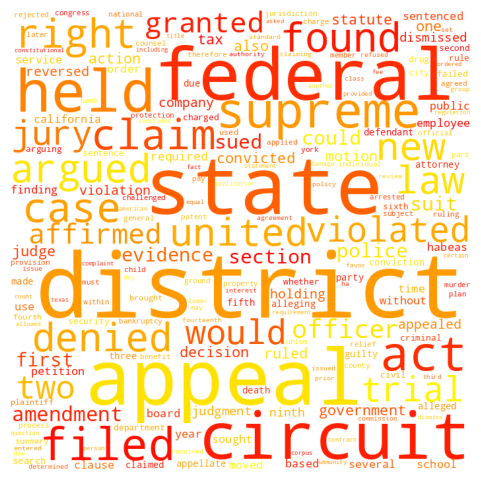

In [63]:
wordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 700, height = 700, random_state = 43,
                      prefer_horizontal = True).generate_from_frequencies(fd)

plt.figure(figsize = (6, 6))
plt.imshow(wordcloud)


plt.axis('off')

plt.show()

##fist_party_winner==1

In [64]:
fw = data.loc[data.first_party_winner == 1]
sw = data.loc[data.first_party_winner == 0]

In [65]:
fw_fact=[]

fw_fact=fw['facts'].to_list()
fw_fact[0]

'On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant?™s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana?™s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with ?œmalice.?? Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rathe

In [66]:
fw_c=[]

for fw_fact in fw_fact:
    fw_c.append([lemmatizer.lemmatize(word.lower()) # 소문자 변환
                                   for word in fw_fact.split()# 공백 기준 문자열 분리
                                   if word.isalpha() #알파벳인지 검사, 해당 단어가 문자이고
                                   and word not in all_names]) #&단어를 모아놓은 all_names에 해당 단어 없으면 원소로 넣어주기

fw_c[0]

['on',
 'a',
 'candidate',
 'for',
 'public',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'baton',
 'during',
 'this',
 'amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activity',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'teamster',
 'amant',
 'implicated',
 'an',
 'east',
 'baton',
 'rouge',
 'deputy',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'teamster',
 'union',
 'and',
 'political',
 'thompson',
 'successfully',
 'sued',
 'amant',
 'for',
 'first',
 'circuit',
 'court',
 'of',
 'appeal',
 'holding',
 'that',
 'thompson',
 'did',
 'not',
 'show',
 'amant',
 'acted',
 'with',
 'thompson',
 'then',
 'appealed',
 'to',
 'the',
 'supreme',
 'court',
 'of',
 'that',
 'court',
 'held',
 'although',
 'public',
 'figure',
 'forfeit',
 'some',
 'of',
 'their',
 'first',
 'amendment',
 'protection',
 'from',
 'amant',
 'accused',
 'thompson',
 '

In [67]:
fw_cleaned_facts=[]

for fact in fw_c:
  fw_cleaned_facts.append(' '.join(fact))

fw_cleaned_facts[0]

'on a candidate for public made a television speech in baton during this amant accused his political opponent of being a communist and of being involved in criminal activity with the head of the local teamster amant implicated an east baton rouge deputy in a scheme to move money between the teamster union and political thompson successfully sued amant for first circuit court of appeal holding that thompson did not show amant acted with thompson then appealed to the supreme court of that court held although public figure forfeit some of their first amendment protection from amant accused thompson of a crime with utter disregard of whether the remark were that court held that the first amendment protects robust rather than an open season to shoot down the good name of anyone who happens to be a public'

In [68]:
fw_tot=",".join(fw_cleaned_facts)
fw_tot

'on a candidate for public made a television speech in baton during this amant accused his political opponent of being a communist and of being involved in criminal activity with the head of the local teamster amant implicated an east baton rouge deputy in a scheme to move money between the teamster union and political thompson successfully sued amant for first circuit court of appeal holding that thompson did not show amant acted with thompson then appealed to the supreme court of that court held although public figure forfeit some of their first amendment protection from amant accused thompson of a crime with utter disregard of whether the remark were that court held that the first amendment protects robust rather than an open season to shoot down the good name of anyone who happens to be a public,an alabama state court convicted magwood of murder and sentenced him to an alabama federal district court partially granted petition for federal habeas corpus the court upheld his convictio

In [69]:
word_tokens = word_tokenize(fw_tot)
fw_result = []

for w in word_tokens:
    if w.isalpha() and w not in stopwords_m and w not in stop_words:
        fw_result.append(w)

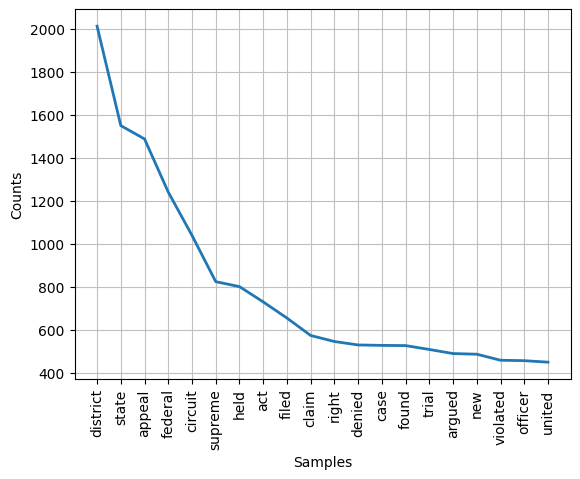

<Axes: xlabel='Samples', ylabel='Counts'>

In [70]:
from nltk import Text

fw_text=Text(fw_result)


fw_text.plot(20)

In [71]:
fwc=Counter(fw_result).most_common()
fwc

[('district', 2013),
 ('state', 1551),
 ('appeal', 1489),
 ('federal', 1242),
 ('circuit', 1041),
 ('supreme', 826),
 ('held', 803),
 ('act', 732),
 ('filed', 657),
 ('claim', 576),
 ('right', 548),
 ('denied', 532),
 ('case', 530),
 ('found', 529),
 ('trial', 511),
 ('argued', 492),
 ('new', 489),
 ('violated', 461),
 ('officer', 459),
 ('united', 452),
 ('law', 437),
 ('jury', 435),
 ('police', 413),
 ('would', 410),
 ('granted', 406),
 ('affirmed', 391),
 ('amendment', 385),
 ('two', 381),
 ('sued', 373),
 ('evidence', 372),
 ('could', 357),
 ('decision', 344),
 ('suit', 343),
 ('first', 329),
 ('convicted', 327),
 ('also', 316),
 ('judge', 315),
 ('government', 310),
 ('motion', 304),
 ('action', 301),
 ('one', 300),
 ('reversed', 292),
 ('violation', 291),
 ('section', 287),
 ('company', 285),
 ('ninth', 281),
 ('tax', 276),
 ('appealed', 270),
 ('holding', 268),
 ('statute', 267),
 ('ruled', 264),
 ('habeas', 253),
 ('required', 250),
 ('judgment', 249),
 ('based', 249),
 ('petit

In [72]:
fwd = fw_text.vocab()
fwd

FreqDist({'district': 2013, 'state': 1551, 'appeal': 1489, 'federal': 1242, 'circuit': 1041, 'supreme': 826, 'held': 803, 'act': 732, 'filed': 657, 'claim': 576, ...})

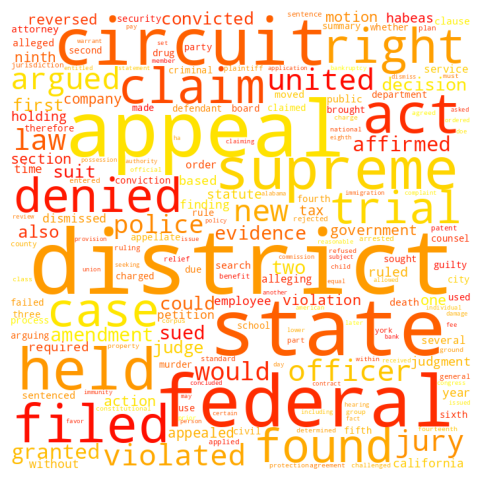

In [73]:
fwordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 700, height = 700, random_state = 43,
                      prefer_horizontal = True).generate_from_frequencies(fwd)

plt.figure(figsize = (6, 6))
plt.imshow(fwordcloud)


plt.axis('off')

plt.show()

## first_party_winner ==0

In [74]:
sw_fact=[]

sw_fact=sw['facts'].to_list()
sw_fact[0]

'Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson?™s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens??bench trial ruled that Owens was probably also a drug dealer and was trying to ?œknock [Nelson] off.??Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The U.S. Court of Appeals for the Seventh Circu

In [75]:
sw_c=[]

for sw_fact in sw_fact:
    sw_c.append([lemmatizer.lemmatize(word.lower()) # 소문자 변환
                                   for word in sw_fact.split()# 공백 기준 문자열 분리
                                   if word.isalpha() #알파벳인지 검사, 해당 단어가 문자이고
                                   and word not in all_names]) #&단어를 모아놓은 all_names에 해당 단어 없으면 원소로 넣어주기

sw_c[0]

['wa',
 'riding',
 'his',
 'bike',
 'when',
 'he',
 'suffered',
 'a',
 'lethal',
 'blow',
 'to',
 'the',
 'back',
 'of',
 'his',
 'head',
 'with',
 'a',
 'baseball',
 'after',
 'two',
 'eyewitness',
 'identified',
 'owen',
 'from',
 'an',
 'array',
 'of',
 'photo',
 'and',
 'then',
 'a',
 'he',
 'wa',
 'tried',
 'and',
 'convicted',
 'for',
 'because',
 'wa',
 'carrying',
 'cocaine',
 'and',
 'crack',
 'cocaine',
 'potentially',
 'for',
 'the',
 'judge',
 'at',
 'trial',
 'ruled',
 'that',
 'owen',
 'wa',
 'probably',
 'also',
 'a',
 'drug',
 'dealer',
 'and',
 'wa',
 'trying',
 'to',
 'wa',
 'found',
 'guilty',
 'of',
 'murder',
 'and',
 'sentenced',
 'to',
 'year',
 'in',
 'owen',
 'filed',
 'a',
 'petition',
 'for',
 'a',
 'writ',
 'of',
 'habeas',
 'corpus',
 'on',
 'the',
 'ground',
 'that',
 'his',
 'constitutional',
 'right',
 'to',
 'due',
 'process',
 'wa',
 'violated',
 'during',
 'the',
 'he',
 'argued',
 'that',
 'the',
 'eyewitness',
 'identification',
 'should',
 'have',


In [76]:
sw_cleaned_facts=[]

for fact in sw_c:
  sw_cleaned_facts.append(' '.join(fact))

sw_cleaned_facts[0]

'wa riding his bike when he suffered a lethal blow to the back of his head with a baseball after two eyewitness identified owen from an array of photo and then a he wa tried and convicted for because wa carrying cocaine and crack cocaine potentially for the judge at trial ruled that owen wa probably also a drug dealer and wa trying to wa found guilty of murder and sentenced to year in owen filed a petition for a writ of habeas corpus on the ground that his constitutional right to due process wa violated during the he argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive wa not an element of the the district court denied the writ of habeas and owen the court of appeal for the seventh circuit reversed the denial and held that the trial inference about motive violated his right to have his guilt adjudicated solely based on the evidence presented at'

In [77]:
sw_tot=",".join(sw_cleaned_facts)
sw_tot

'wa riding his bike when he suffered a lethal blow to the back of his head with a baseball after two eyewitness identified owen from an array of photo and then a he wa tried and convicted for because wa carrying cocaine and crack cocaine potentially for the judge at trial ruled that owen wa probably also a drug dealer and wa trying to wa found guilty of murder and sentenced to year in owen filed a petition for a writ of habeas corpus on the ground that his constitutional right to due process wa violated during the he argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive wa not an element of the the district court denied the writ of habeas and owen the court of appeal for the seventh circuit reversed the denial and held that the trial inference about motive violated his right to have his guilt adjudicated solely based on the evidence presented at,linkletter wa convicted in state cou

In [78]:
word_tokens = word_tokenize(sw_tot)
sw_result = []

for w in word_tokens:
    if w.isalpha() and w not in stopwords_m and w not in stop_words:
        sw_result.append(w)

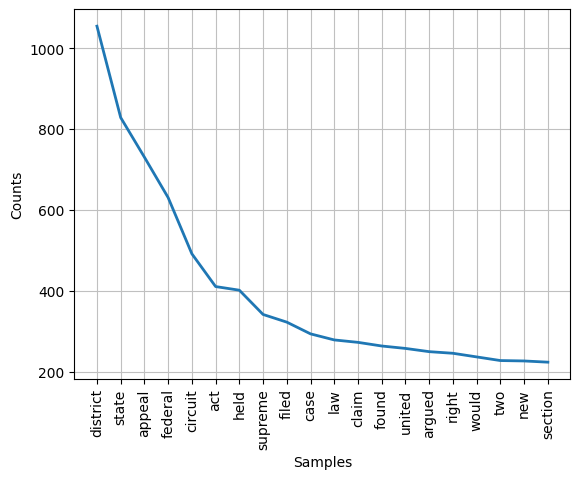

<Axes: xlabel='Samples', ylabel='Counts'>

In [79]:
from nltk import Text

sw_text=Text(sw_result)


sw_text.plot(20)

In [80]:
swc=Counter(sw_result).most_common()
swc

[('district', 1055),
 ('state', 829),
 ('appeal', 731),
 ('federal', 631),
 ('circuit', 492),
 ('act', 411),
 ('held', 402),
 ('supreme', 342),
 ('filed', 323),
 ('case', 294),
 ('law', 279),
 ('claim', 273),
 ('found', 264),
 ('united', 258),
 ('argued', 250),
 ('right', 246),
 ('would', 237),
 ('two', 228),
 ('new', 227),
 ('section', 224),
 ('jury', 222),
 ('violated', 217),
 ('denied', 203),
 ('granted', 197),
 ('government', 197),
 ('ruled', 186),
 ('tax', 182),
 ('could', 181),
 ('amendment', 179),
 ('first', 179),
 ('suit', 178),
 ('affirmed', 177),
 ('sued', 170),
 ('statute', 169),
 ('also', 167),
 ('trial', 166),
 ('convicted', 164),
 ('action', 163),
 ('one', 159),
 ('judge', 157),
 ('school', 154),
 ('motion', 143),
 ('evidence', 138),
 ('year', 136),
 ('holding', 135),
 ('police', 132),
 ('dismissed', 132),
 ('board', 130),
 ('violation', 130),
 ('company', 125),
 ('decision', 124),
 ('employee', 122),
 ('appealed', 121),
 ('judgment', 120),
 ('service', 120),
 ('use', 119

In [81]:
swd = sw_text.vocab()
swd

FreqDist({'district': 1055, 'state': 829, 'appeal': 731, 'federal': 631, 'circuit': 492, 'act': 411, 'held': 402, 'supreme': 342, 'filed': 323, 'case': 294, ...})

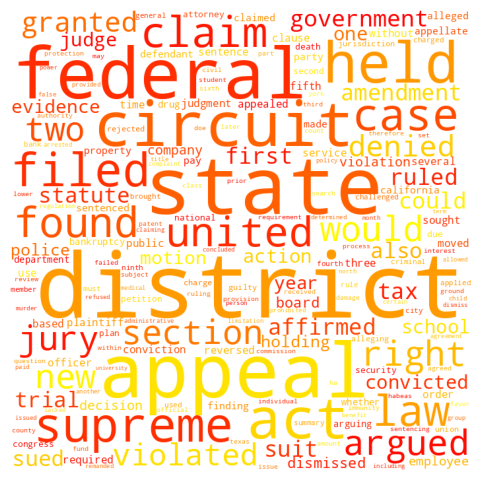

In [82]:
swordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 700, height = 700, random_state = 43,
                      prefer_horizontal = True).generate_from_frequencies(swd)

plt.figure(figsize = (6, 6))
plt.imshow(swordcloud)


plt.axis('off')

plt.show()

In [83]:
comp= pd.DataFrame(fwc)
comp

0     1
0        district  2013
1           state  1551
2          appeal  1489
3         federal  1242
4         circuit  1041
...           ...   ...
10185  cardholder     1
10186  dependence     1
10187    mexicano     1
10188     trouble     1
10189   frustrate     1

[10190 rows x 2 columns]

In [84]:
comp.rename(columns={0:'fw_word',1:'fw_freq'},inplace=True)
comp

fw_word  fw_freq
0        district     2013
1           state     1551
2          appeal     1489
3         federal     1242
4         circuit     1041
...           ...      ...
10185  cardholder        1
10186  dependence        1
10187    mexicano        1
10188     trouble        1
10189   frustrate        1

[10190 rows x 2 columns]

In [85]:
tmp= pd.DataFrame(swc)
tmp.rename(columns={0:'sw_word',1:'sw_freq'},inplace=True)
tmp

sw_word  sw_freq
0     district     1055
1        state      829
2       appeal      731
3      federal      631
4      circuit      492
...        ...      ...
7309  readable        1
7310  localize        1
7311  spurious        1
7312    ticket        1
7313  province        1

[7314 rows x 2 columns]

In [86]:
comp=comp.join(tmp)
comp.head(20)

fw_word  fw_freq   sw_word  sw_freq
0   district     2013  district   1055.0
1      state     1551     state    829.0
2     appeal     1489    appeal    731.0
3    federal     1242   federal    631.0
4    circuit     1041   circuit    492.0
5    supreme      826       act    411.0
6       held      803      held    402.0
7        act      732   supreme    342.0
8      filed      657     filed    323.0
9      claim      576      case    294.0
10     right      548       law    279.0
11    denied      532     claim    273.0
12      case      530     found    264.0
13     found      529    united    258.0
14     trial      511    argued    250.0
15    argued      492     right    246.0
16       new      489     would    237.0
17  violated      461       two    228.0
18   officer      459       new    227.0
19    united      452   section    224.0

##name 있는 버전

In [ ]:
#clean_n=[]

#for fact in fact:
#    clean_n.append([lemmatizer.lemmatize(word.lower()) # 소문자 변환
#                                   for word in fact.split()# 공백 기준 문자열 분리
#                                   if word.isalpha()])  #알파벳인지 검사, 해당 단어가 문자이고


#clean_n[0]

In [87]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
#from nltk.corpus.reader.tagged import word_tokenize
#from nltk.corpus import stopwords

#stopwords_m = ["'",'','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','subject']

#stop_words = set(stopwords.words('english'))#패키지에 미리정의된 영어불용어를 가져옴

#tmp=[]

#for email in emails: #emails에 담겨있는 데이터 하나하나 작업
#    tmp.append([lemmatizer.lemmatize(word.lower()) # 소문자 변환
#                                   for word in email.split()# 공백 기준 문자열 분리
#                                   if word.isalpha() and word not in stopwords_m and word not in stop_words]) # 불용어 처리


#tmp[574]

NameError: ignored

In [89]:
tran=[]

tran=data['translate'].to_list()
tran[0]

'1962년 6월 27일, 공직 후보인 Phil St. Amant는 루이지애나 주 배턴루지에서 텔레비전 연설을 했습니다. 이 연설에서 St. Amant는 그의 정치적 반대자가 공산주의자이며 지역 Teamsters Union의 수장과 범죄 활동에 연루되어 있다고 비난했습니다. 마지막으로 St. Amant는 East Baton Rouge 부 보안관인 Herman Thompson을 Teamsters Union과 St. Amant의 정적 사이에서 자금을 이동시키려는 계획에 연루시켰습니다.\nThompson은 명예 훼손으로 St. Amant를 성공적으로 고소했습니다. 루이지애나의 제1 순회 항소 법원은 Thompson이 St. Amant가 "악의"로 행동했음을 보여주지 않았다고 주장하면서 뒤집혔습니다. 그런 다음 Thompson은 루이지애나 대법원에 항소했습니다. 그 법원은 유명 인사들이 명예 훼손에 대한 수정헌법 제1조의 보호를 일부 상실했지만 St. Amant는 발언이 사실인지 여부를 완전히 무시한 채 톰슨을 범죄로 고발했다고 판결했습니다. 마지막으로, 그 법원은 수정헌법 제1조가 우연히 공무원이 된 사람의 명예를 깎아내리기 위한 공개적인 시즌보다는 자유롭고 활발한 토론을 보호한다고 판결했습니다.\n'

In [90]:
tran_tot=",".join(tran)
tran_tot

'1962년 6월 27일, 공직 후보인 Phil St. Amant는 루이지애나 주 배턴루지에서 텔레비전 연설을 했습니다. 이 연설에서 St. Amant는 그의 정치적 반대자가 공산주의자이며 지역 Teamsters Union의 수장과 범죄 활동에 연루되어 있다고 비난했습니다. 마지막으로 St. Amant는 East Baton Rouge 부 보안관인 Herman Thompson을 Teamsters Union과 St. Amant의 정적 사이에서 자금을 이동시키려는 계획에 연루시켰습니다.\nThompson은 명예 훼손으로 St. Amant를 성공적으로 고소했습니다. 루이지애나의 제1 순회 항소 법원은 Thompson이 St. Amant가 "악의"로 행동했음을 보여주지 않았다고 주장하면서 뒤집혔습니다. 그런 다음 Thompson은 루이지애나 대법원에 항소했습니다. 그 법원은 유명 인사들이 명예 훼손에 대한 수정헌법 제1조의 보호를 일부 상실했지만 St. Amant는 발언이 사실인지 여부를 완전히 무시한 채 톰슨을 범죄로 고발했다고 판결했습니다. 마지막으로, 그 법원은 수정헌법 제1조가 우연히 공무원이 된 사람의 명예를 깎아내리기 위한 공개적인 시즌보다는 자유롭고 활발한 토론을 보호한다고 판결했습니다.\n,Ramon Nelson은 자전거를 타고 가다가 야구 방망이로 머리 뒤쪽을 치명상을 입었습니다. 두 명의 목격자가 일련의 사진과 라인업에서 Lawrence Owens를 확인한 후 그는 Nelson의 죽음으로 재판을 받고 유죄 판결을 받았습니다. Nelson은 잠재적으로 유통을 위해 코카인과 크랙 코카인을 소지하고 있었기 때문에 Owens의 벤치 재판에서 판사는 Owens가 아마도 마약 딜러였으며 "[Nelson]을 노크"하려고 시도했다고 판결했습니다. Owens는 1급 살인죄로 유죄 판결을 받고 25년형을 선고 받았습니다.\nOwens는 재판 중에 적법 절차에 대한 헌법상의 권리가 침해되었다는 이유로 인신 보호 영장 청원서를 제출했습니다. 그는 목격자 신원 확인은 신뢰할

In [91]:
okt = Okt()
nouns = okt.nouns(tran_tot) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words)
c.most_common()

[('법원', 7124),
 ('판결', 4101),
 ('주장', 3019),
 ('항소', 2741),
 ('대한', 2628),
 ('지방', 1963),
 ('미국', 1948),
 ('연방', 1705),
 ('제기', 1528),
 ('소송', 1517),
 ('유죄', 1374),
 ('대해', 1374),
 ('때문', 1361),
 ('기각', 1248),
 ('사건', 1247),
 ('위반', 1223),
 ('위해', 1209),
 ('대법원', 1159),
 ('헌법', 1081),
 ('확인', 1074),
 ('거부', 1056),
 ('결정', 1020),
 ('재판', 971),
 ('수정', 933),
 ('혐의', 903),
 ('순회', 892),
 ('금지', 842),
 ('정부', 819),
 ('청구', 783),
 ('신청', 778),
 ('사용', 776),
 ('자신', 773),
 ('보호', 759),
 ('승인', 735),
 ('선고', 726),
 ('다른', 709),
 ('회항', 706),
 ('요청', 702),
 ('명령', 700),
 ('지방법원', 698),
 ('조항', 690),
 ('증거', 675),
 ('권리', 655),
 ('요구', 644),
 ('판사', 620),
 ('절차', 611),
 ('적용', 611),
 ('경찰', 594),
 ('그녀', 569),
 ('청원', 547),
 ('관련', 546),
 ('동의', 539),
 ('제출', 535),
 ('판단', 532),
 ('위원회', 519),
 ('모든', 510),
 ('기소', 508),
 ('동안', 500),
 ('허용', 492),
 ('제공', 490),
 ('계약', 486),
 ('포함', 482),
 ('해당', 477),
 ('회사', 475),
 ('직원', 473),
 ('원단', 451),
 ('배심', 450),
 ('경우', 448),
 ('자격', 432),
 ('범죄', 